In [1]:
%matplotlib inline

import os
import sys

import matplotlib.pyplot as plt

from scipy.signal import welch

from fooof import FOOOF

sys.path.append('/Users/tom/Desktop/untitled folder/NeuralynxIO/neuralynx_io')
import neuralynx_io

In [2]:
# # Install neo - if not already installed
# import sys
# !{sys.executable} -m pip install neo

In [3]:
import neo

from neo.io.neuralynxio import NeuralynxIO

In [4]:
#  Note: to load as is, code presumes the data folder is in the same directory as this notebook

# Check what files are available in local directory
print([f for f in os.listdir() if f[0] is not '.'])

['NeuralynxIO', 'R016-2012-10-08', 'Untitled.ipynb', 'Untitled1.ipynb', 'Untitled2.ipynb']


In [5]:
# Load the folder of Neuralynx data
dat = NeuralynxIO('./R016-2012-10-08/')

In [6]:
# Data Organization

# Pull out sampling rate
s_rate = dat.get_signal_sampling_rate()

# Extract a matrix of data
data = dat.get_analogsignal_chunk().T

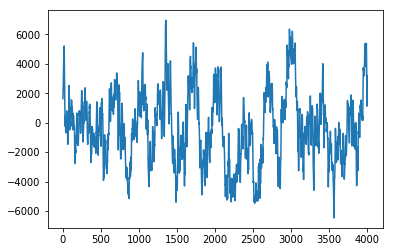

In [7]:
# Sanity check a segment of data

# Set start time to 
chi = 0 # Channel index to plot
pst = 0 # Start time in seconds
dur = 2 # Duration to plot

# Plot data
t0 = int(pst * s_rate)
t1 = t0 + int(dur * s_rate)
plt.plot(data[chi, t0:t1])

In [8]:
# Take a power spectrum
fs, ps = welch(data[0, 0:5000], 2000, nperseg=2000)

In [9]:
# # Install fooof - if not already installed
# import sys
# !{sys.executable} -m pip install fooof

# FOOOF: http://github.com/voytekresearch/fooof

In [10]:
# FOOOF settings
bg_mode = 'fixed'
f_range = [3, 40]

In [11]:
# Initialize FOOOF object
fm = FOOOF(background_mode=bg_mode)

In [12]:
# Add PSD data to FOOOF object
fm.add_data(fs, ps, f_range)

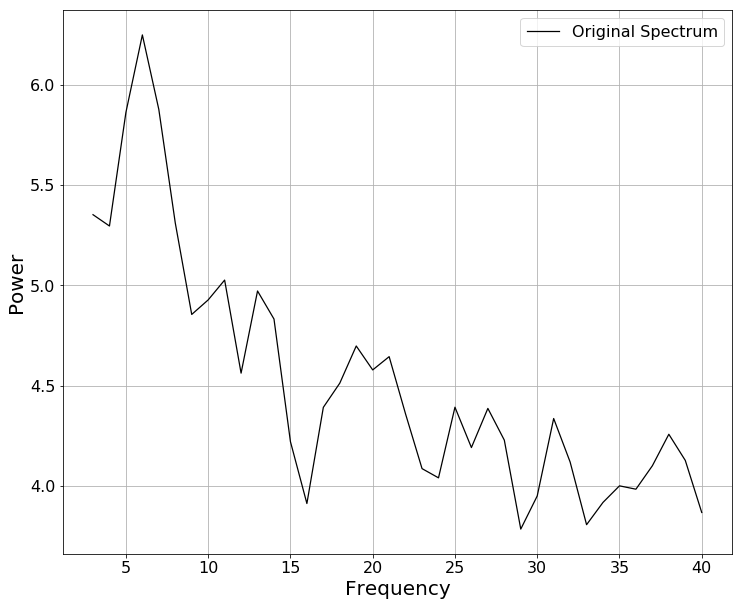

In [13]:
# Plot the power spectrum
fm.plot()

In [14]:
# Fit the FOOOF model
fm.fit()


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 1.00 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is freq-res)
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.



                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 3 - 40 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                             Background Parameters (offset, slope):                               
                                          6.0214, 1.2704                                          
                                                                                                  
                                       1 peaks were found:                                        
          

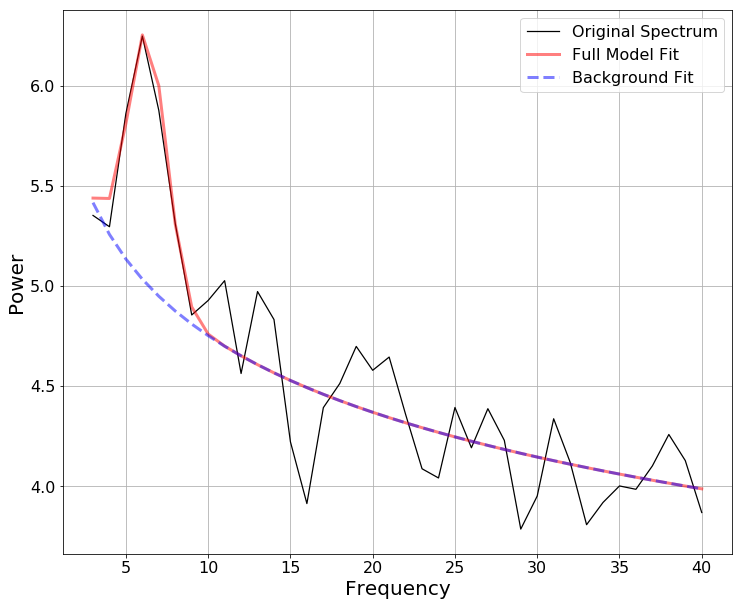

In [15]:
# Check model fit results
fm.print_results()
fm.plot()

In [16]:
# Note: if you want to add data, fit, and plot all together, do:
# fm.report(fs, ps, f_range)